## Obtaining the Efficient Frontier - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Ok, let’s continue the exercise from the last lecture.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['WMT', 'FB']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [2]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.54680927, 0.45319073])

Now, estimate the expected Portfolio Return, Variance, and Volatility.

Expected Portfolio Return:

In [3]:
np.sum(weights * log_returns.mean()) * 250

0.15769666016623007

Expected Portfolio Variance:

In [4]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.04076679261245704

Expected Portfolio Volatility:

In [5]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.2019078815015824

***

The rest of this exercise will be a reproduction of what we did in the previous video.

1)	Create two empty lists. Name them pf_returns and pf_volatilites.

In [6]:
pf_returns = []
pf_volatilities = []

2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [7]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns, pf_volatilities

([0.20481051548542914,
  0.1549342907320733,
  0.16252100156589708,
  0.21856863430163395,
  0.16787169450644246,
  0.10764062891348433,
  0.19154961567196796,
  0.20659395625722643,
  0.16311617688463334,
  0.1553188505911129,
  0.17114952388325502,
  0.1655643178016808,
  0.13541774746275737,
  0.1580003975638213,
  0.1660761363042133,
  0.18132479316790825,
  0.15584735599503624,
  0.12668385936017207,
  0.16693816517810095,
  0.16635538650845388,
  0.11777112107816545,
  0.18118330258670673,
  0.1649451280260808,
  0.2160234549786275,
  0.13237252108662553,
  0.1831440397242452,
  0.18856369527814798,
  0.13816797194818825,
  0.18221972981675308,
  0.155662438109855,
  0.13393892727169424,
  0.1946074864082515,
  0.177284009872706,
  0.21410432500492893,
  0.1755440231859456,
  0.19855389031930124,
  0.19520068870734936,
  0.10571389857601267,
  0.181097031719517,
  0.17824010153210987,
  0.12910764290211432,
  0.16369107172658973,
  0.1435121973857366,
  0.21532281678803958,
  0.1

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays. 

In [8]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

(array([0.20481052, 0.15493429, 0.162521  , 0.21856863, 0.16787169,
        0.10764063, 0.19154962, 0.20659396, 0.16311618, 0.15531885,
        0.17114952, 0.16556432, 0.13541775, 0.1580004 , 0.16607614,
        0.18132479, 0.15584736, 0.12668386, 0.16693817, 0.16635539,
        0.11777112, 0.1811833 , 0.16494513, 0.21602345, 0.13237252,
        0.18314404, 0.1885637 , 0.13816797, 0.18221973, 0.15566244,
        0.13393893, 0.19460749, 0.17728401, 0.21410433, 0.17554402,
        0.19855389, 0.19520069, 0.1057139 , 0.18109703, 0.1782401 ,
        0.12910764, 0.16369107, 0.1435122 , 0.21532282, 0.16259464,
        0.20627176, 0.15330689, 0.10619615, 0.21282002, 0.17659385,
        0.16306082, 0.14455218, 0.163311  , 0.14627466, 0.21757207,
        0.20427247, 0.19724079, 0.20756342, 0.10571019, 0.1532941 ,
        0.1723685 , 0.16231375, 0.14233649, 0.1875958 , 0.15879829,
        0.20329814, 0.19283351, 0.11830072, 0.16508795, 0.14678482,
        0.22045765, 0.11662829, 0.16902085, 0.18

Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [9]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_volatilities})

In [10]:
portfolios.head()

,Return,Volatility
0,0.204811,0.273528
1,0.154934,0.199329
2,0.162521,0.206952
3,0.218569,0.301010
4,0.167872,0.213300


Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
Organize your chart well and make sure you have labeled both the x- and the y- axes.

Text(0, 0.5, 'Expected Return')

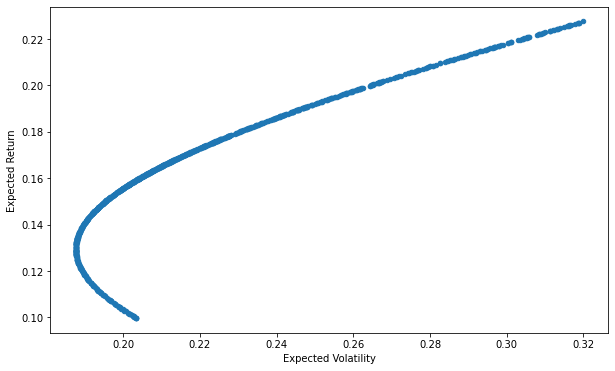

In [11]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

******

What do you think would happen if you re-created the Markowitz Efficient Frontier for 3 stocks? The code you have created is supposed to accommodate easily the addition of a third stock, say British Petroleum (‘BP’). Insert it in your data and re-run the code (you can expand the “Cell” list from the Jupyter menu and click on “Run All” to execute all the cells at once!). <br />

How would you interpret the obtained graph? 


In [12]:
assets = ['WMT', 'FB', 'BP']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [13]:
pf_data.head()

,WMT,FB,BP
Date,,,
2014-01-02,66.034126,54.709999,29.211029
2014-01-03,65.816544,54.560001,29.144064
2014-01-06,65.448326,57.200001,29.223204
2014-01-07,65.649178,57.919998,29.558058
2014-01-08,65.130356,58.230000,29.667650


In [14]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [15]:
num_assets = len(assets)
num_assets

3

In [16]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.65673678, 0.23861164, 0.10465158])

In [17]:
weights[0] + weights[1] + weights[2]

1.0000000000000002

Expected Portfolio Return:

In [18]:
np.sum(weights * log_returns.mean()) * 250

0.11812956787841622

Expected Portfolio Variance:

In [19]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.03217610099249004

Expected Portfolio Volatility:

In [20]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.17937698010751002

*****

In [21]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 0.10328805,  0.11315111,  0.09302693,  0.1409022 ,  0.12967296,
         0.15704942,  0.11415186,  0.10709214,  0.10453433,  0.09386705,
         0.12831219,  0.10876632,  0.1179553 ,  0.10548731,  0.17558003,
         0.06892026,  0.15473359,  0.08477316,  0.05881018,  0.10093035,
         0.20167755,  0.1260868 ,  0.0951508 ,  0.20631507,  0.05439655,
         0.03213034,  0.02939932,  0.16870038,  0.06905778,  0.14498284,
         0.0945962 ,  0.14253928,  0.11067836,  0.02988542,  0.0957378 ,
         0.15515819,  0.09699449,  0.06516987,  0.06842822,  0.0806481 ,
         0.06647777,  0.12205992,  0.11112327,  0.09723783,  0.03296791,
         0.17971496,  0.12544576,  0.11606861,  0.12338602,  0.09786048,
         0.14021609,  0.15342681,  0.10309888,  0.14702497,  0.07833413,
         0.15702992,  0.10411824,  0.08325416,  0.08218498,  0.14397327,
         0.15703109,  0.04646209,  0.08711827,  0.08699885,  0.10566484,
         0.01158014,  0.08640338,  0.10821351,  0.0

In [22]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

Text(0, 0.5, 'Expected Return')

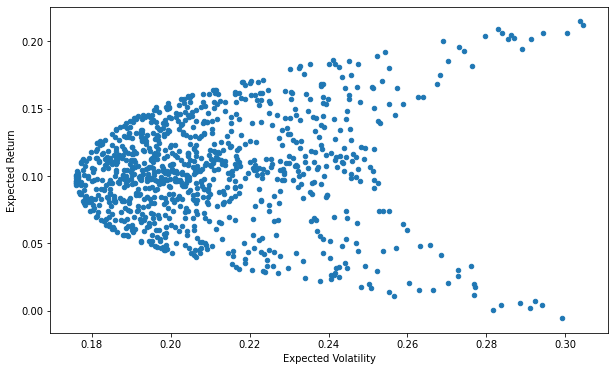

In [23]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')